In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [36]:
df = pd.read_csv("../data/raw/Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [37]:
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

categorical_cols = ['Sex', 'Chest pain type', 'EKG results',
                    'Exercise angina', 'Slope of ST', 
                    'Number of vessels fluro', 'Thallium']       

X = df[numerical_cols + categorical_cols]
Y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=55, stratify=Y
)

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [43]:
logr = linear_model.LogisticRegression(random_state=55, max_iter=1000)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

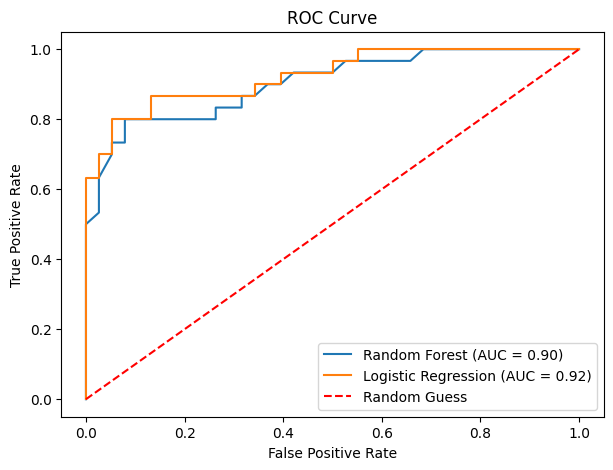

In [45]:
test_df = pd.DataFrame(
    {'True': y_test, 'Random Forest Predicted': y_pred_rf}
)

plt.figure(figsize=(7, 5))

# Random Forest ROC
y_score_rf = rf.predict_proba(X_test)[:, 1]
y_test_bin = (y_test == 'Presence').astype(int)
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Logistic Regression ROC
y_score_logr = logr.predict_proba(X_test)[:, 1]
fpr_logr, tpr_logr, _ = roc_curve(y_test_bin, y_score_logr)
roc_auc_logr = auc(fpr_logr, tpr_logr)
plt.plot(fpr_logr, tpr_logr, label=f'Logistic Regression (AUC = {roc_auc_logr:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Logistic regression achieved comparable or slightly better ROC-AUC relative to Random Forest, indicating that the primary relationships between predictors and heart disease are largely monotonic and do not require complex non-linear modeling.